Import packages.

In [3]:
import cv2
import imutils
import pytesseract
from matplotlib import pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

Get image and display.

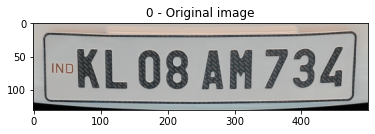

In [4]:
# Read image file
image = cv2.imread('./detections/crop/car1/license_plate_1.png')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

plt.imshow(image)
plt.title('0 - Original image')
plt.show()

Convert RGB to Gray scale.

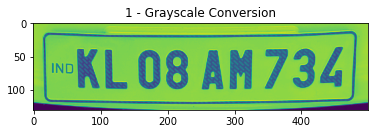

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('1 - Grayscale Conversion')
plt.show()


Noise removal with iterative bilateral filter.

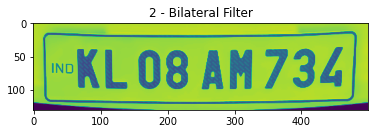

In [6]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)


plt.imshow(gray)
plt.title('2 - Bilateral Filter')
plt.show()

Find Edges of the grayscale image

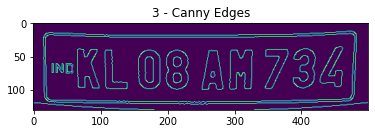

In [7]:
edged = cv2.Canny(gray, 170, 200)


plt.imshow(edged)
plt.title('3 - Canny Edges')
plt.show()

Find contours based on Edges and Create copy of original image to draw all contours.

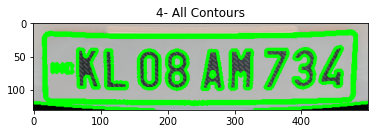

In [8]:
cnts, new  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img1 = image.copy()
cv2.drawContours(img1, cnts, -1, (0,255,0), 3)

plt.imshow(img1)
plt.title('4- All Contours')
plt.show()

Sort contours based on their area keeping minimum required area as '30'.

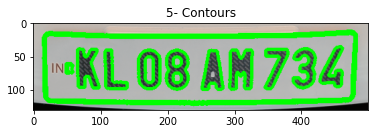

In [9]:
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None #we currently have no Number plate contour

#Contours
img2 = image.copy()
cv2.drawContours(img2, cnts, -1, (0,255,0), 3)

plt.imshow(img2)
plt.title('5- Contours')
plt.show()

Loop over our contours to find the best possible approximate contour of number plate and Draw the selected contour on the original image

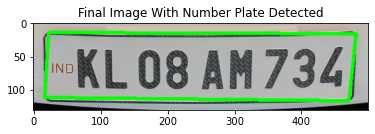

In [10]:
count = 0
idx =1
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour

            # Crop those contours and store it in Cropped Images folder
            x, y, w, h = cv2.boundingRect(c) #This will find out co-ord for plate
            new_img = gray[y:y + h, x:x + w] #Create new image
            cv2.imwrite('C:\\Users\GIT\Cropped Images-Text/' + str(idx) + '.png', new_img) #Store new image
            idx+=1

            break


# Drawing the selected contour on the original image
cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)


plt.imshow(image)
plt.title('Final Image With Number Plate Detected')
plt.show()

Display cropped image.

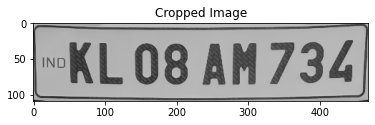

In [11]:
Cropped_img_loc = 'C:\\Users\GIT\Cropped Images-Text/1.png'


plt.imshow(cv2.imread(Cropped_img_loc))
plt.title('Cropped Image')
plt.show()

In [12]:

text = pytesseract.image_to_string(Cropped_img_loc, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
print("Number is :", text)





Number is : KLO8AM734



Show License Plate Detection.